In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/india-states/Igismap/Indian_States.shp
/kaggle/input/india-states/Igismap/Indian_States.prj
/kaggle/input/india-states/Igismap/Indian_States.dbf
/kaggle/input/india-states/Igismap/Indian_States.shx
/kaggle/input/suicide-cases-in-india/Suicides_in_India.csv


# Loading Data

In [2]:
df=pd.read_csv("/kaggle/input/suicide-cases-in-india/Suicides_in_India.csv")

In [3]:
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group
0,A & N ISLANDS,2001,Causes,Cancer,Male,15-29
1,A & N ISLANDS,2001,Causes,Divorce,Male,60+
2,A & N ISLANDS,2001,Causes,Dowry Dispute,Female,60+
3,A & N ISLANDS,2001,Causes,Ideological Causes/Hero Worshipping,Female,60+
4,A & N ISLANDS,2001,Causes,Illness (Aids/STD),Female,0-14
5,A & N ISLANDS,2001,Causes,Paralysis,Male,45-59
6,A & N ISLANDS,2001,Causes,Property Dispute,Male,0-14
7,A & N ISLANDS,2001,Causes,Suspected/Illicit Relation,Female,15-29
8,A & N ISLANDS,2001,Means_adopted,By Consuming Insecticides,Female,0-14
9,A & N ISLANDS,2001,Means_adopted,By Fire/Self Immolation,Female,30-44


In [4]:
df.shape

(237519, 6)

In [5]:
df.describe()

,Year
count,237519.000000
mean,2006.500448
std,3.452240
min,2001.000000
25%,2004.000000
50%,2007.000000
75%,2010.000000
max,2012.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.9+ MB


In [7]:
corel=df.corr()
corel

,Year
Year,1.0


# Relationships between numerical columns.

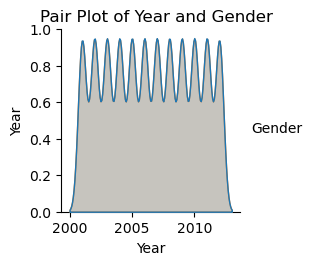

In [8]:
sns.pairplot(df[['Year', 'Gender']], hue='Gender', diag_kind='kde')
plt.suptitle("Pair Plot of Year and Gender", y=1.02)
plt.show()


# ****Exploratory Data Analysis

# Distribution of suicide cases by state

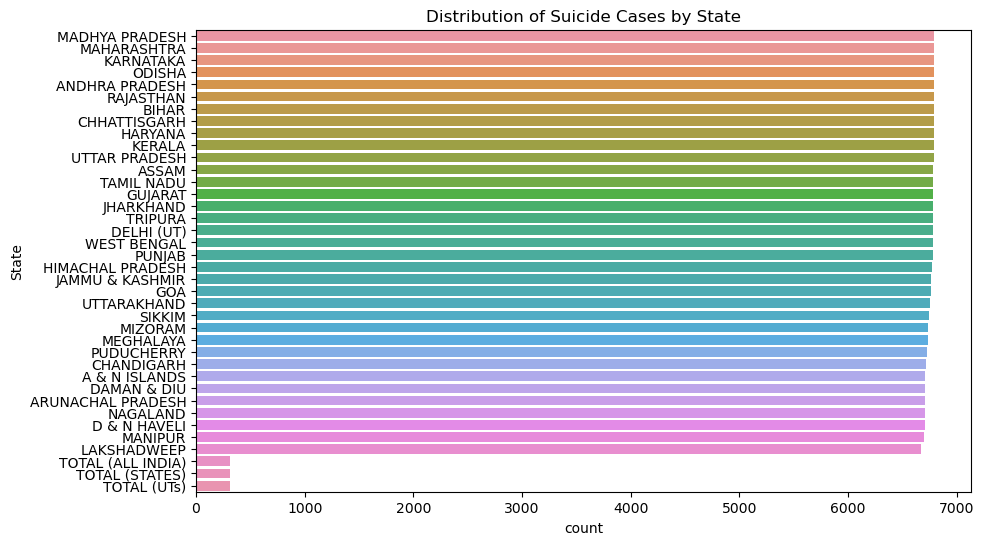

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='State', data=df, order=df['State'].value_counts().index)
plt.title('Distribution of Suicide Cases by State')
plt.show()

# Distribution of suicide cases by year

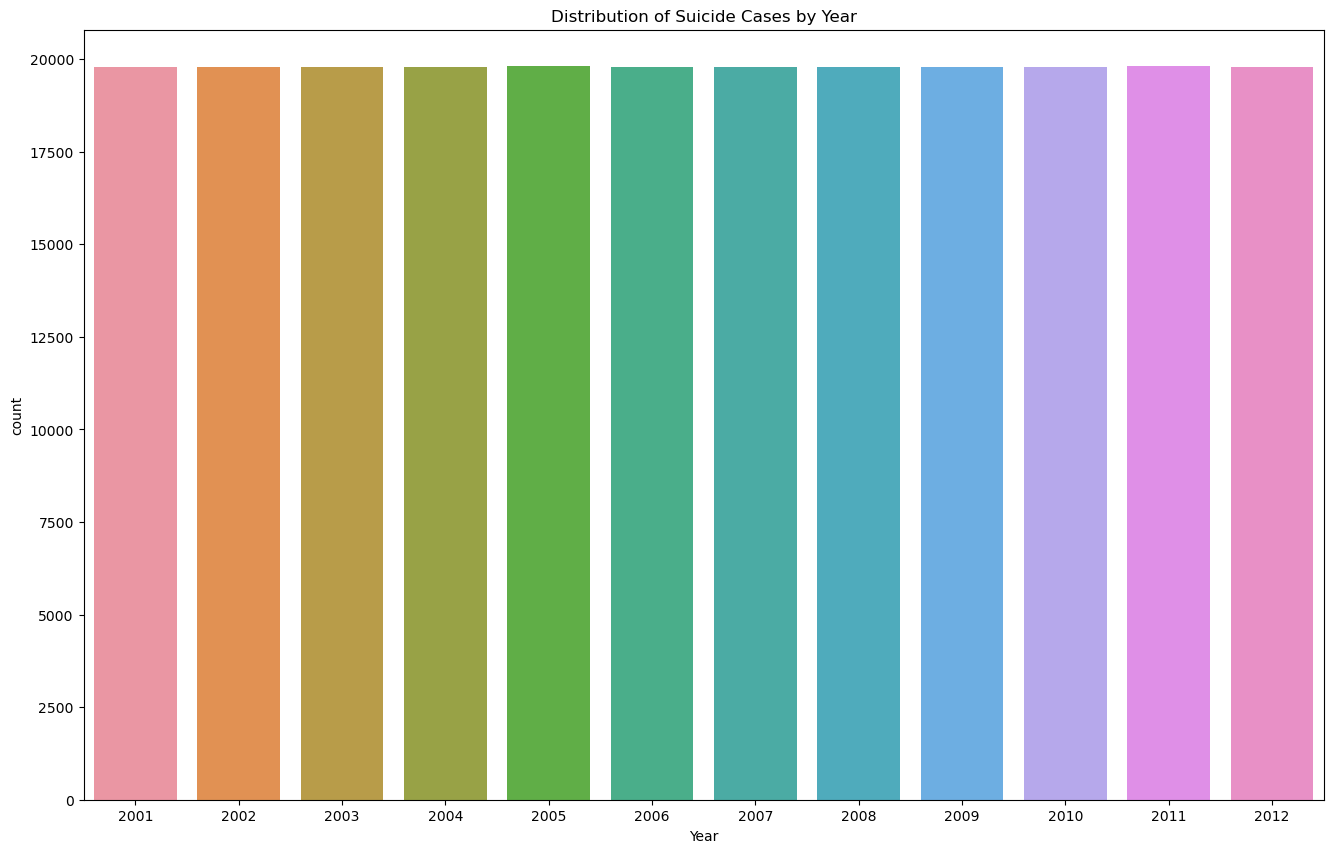

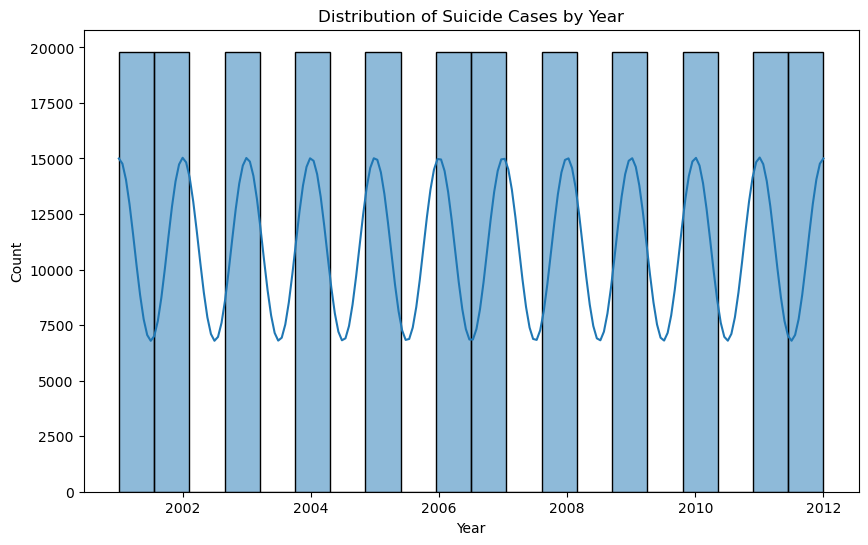

In [10]:
plt.figure(figsize=(16, 10))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Suicide Cases by Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Year', bins=20, kde=True)
plt.title("Distribution of Suicide Cases by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


# Distribution of suicide cases by type code

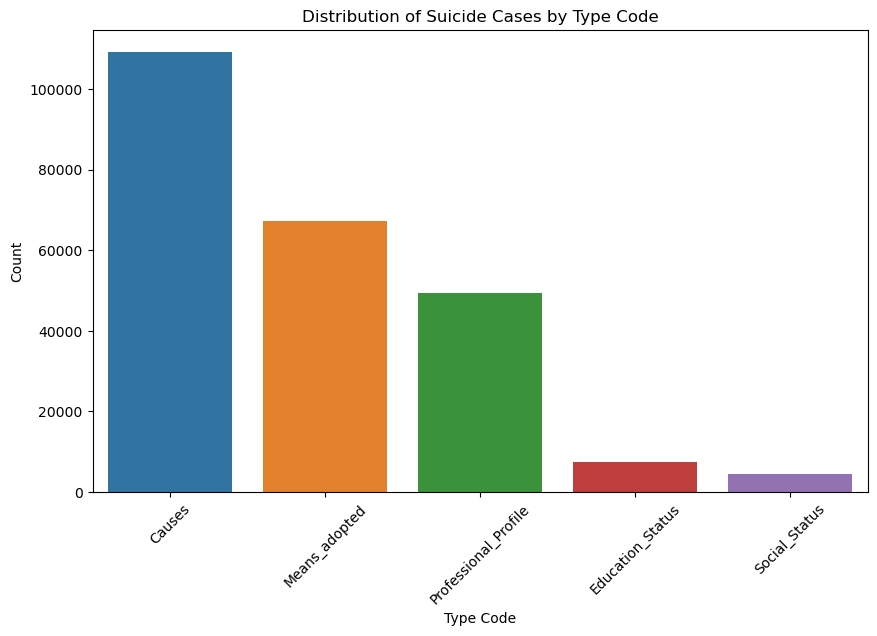

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type_code', order=df['Type_code'].value_counts().index)
plt.title("Distribution of Suicide Cases by Type Code")
plt.xticks(rotation=45)
plt.xlabel("Type Code")
plt.ylabel("Count")
plt.show()


# Distribution of suicide cases by type

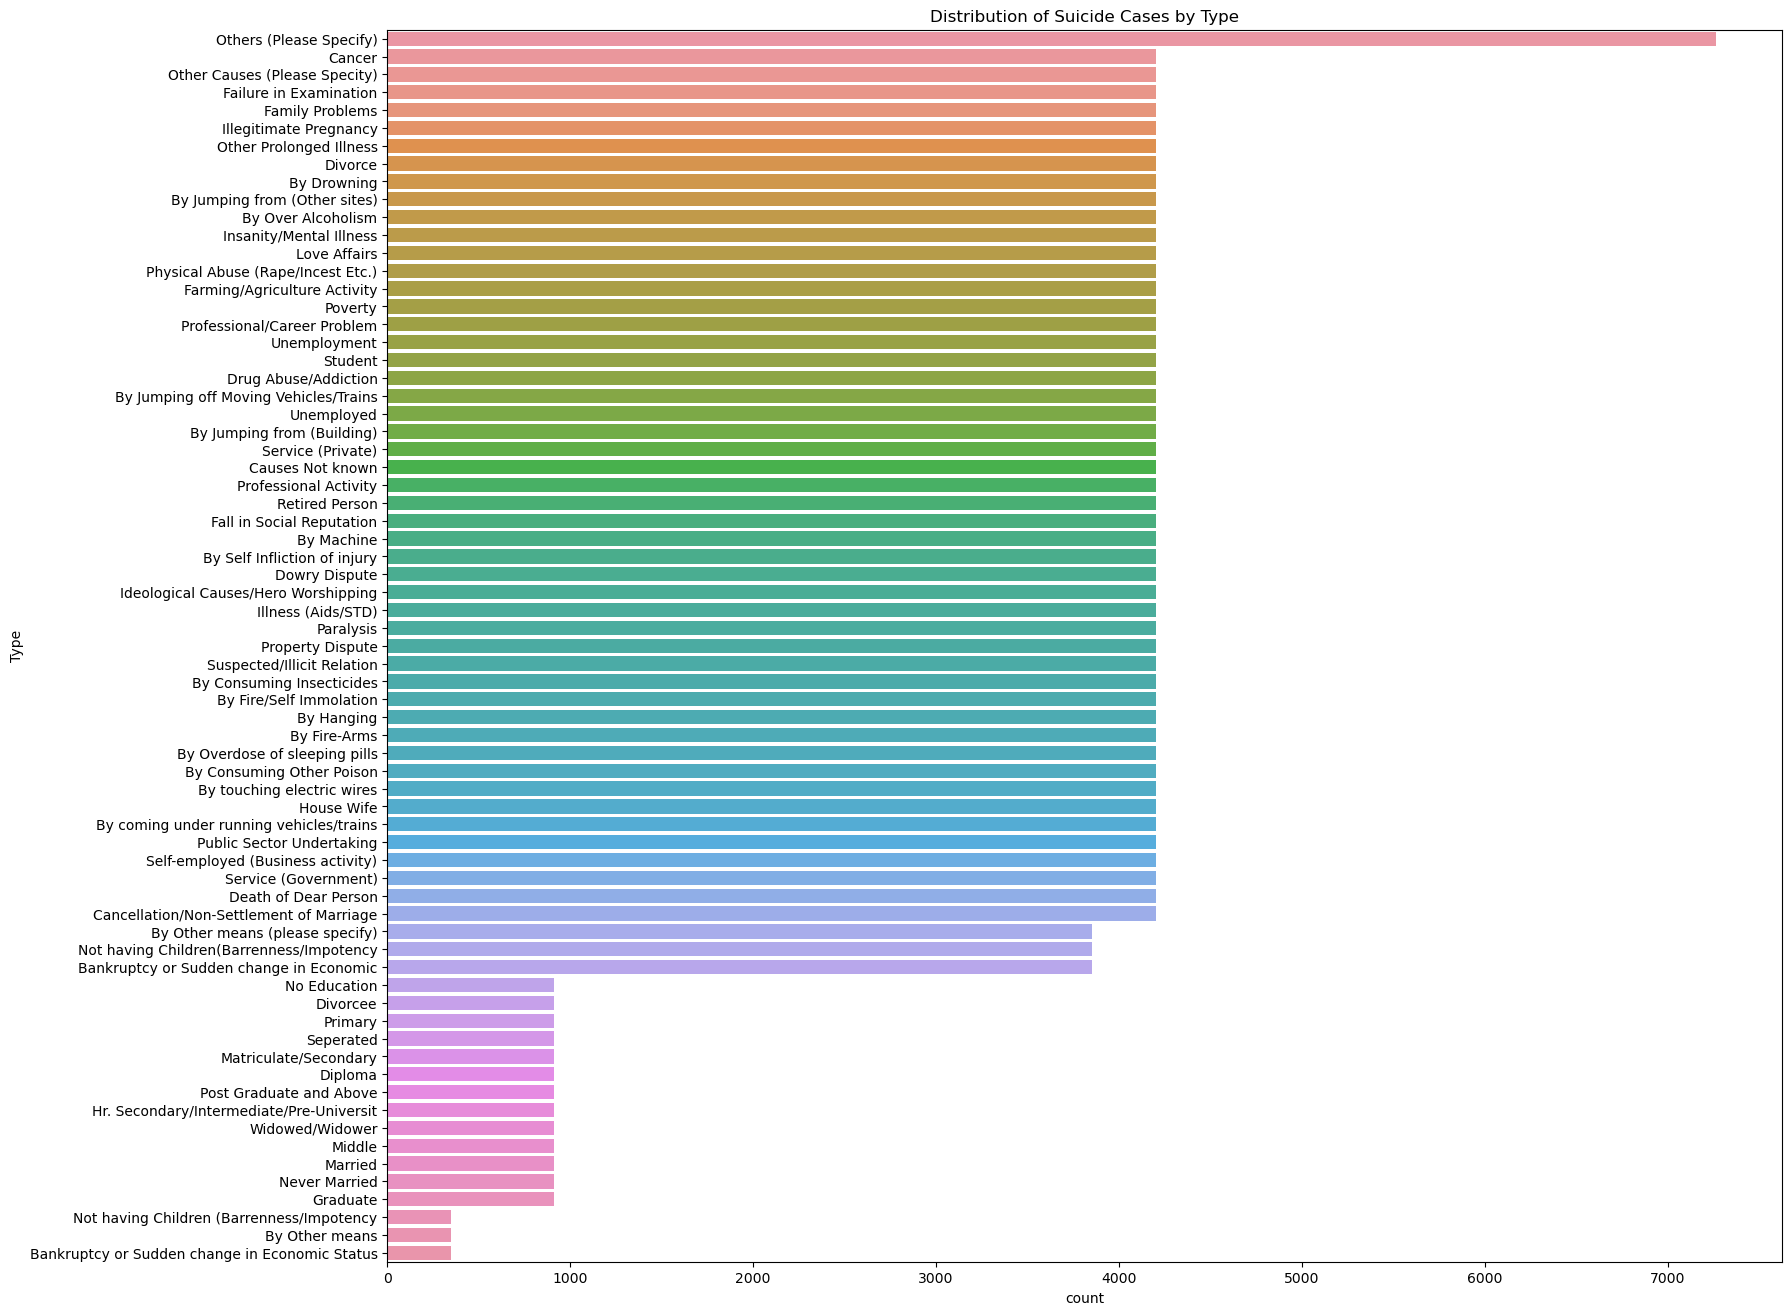

In [12]:
plt.figure(figsize=(18, 16))
sns.countplot(y='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Distribution of Suicide Cases by Type')
plt.show()


# Distribution of Suicide Cases by Gender

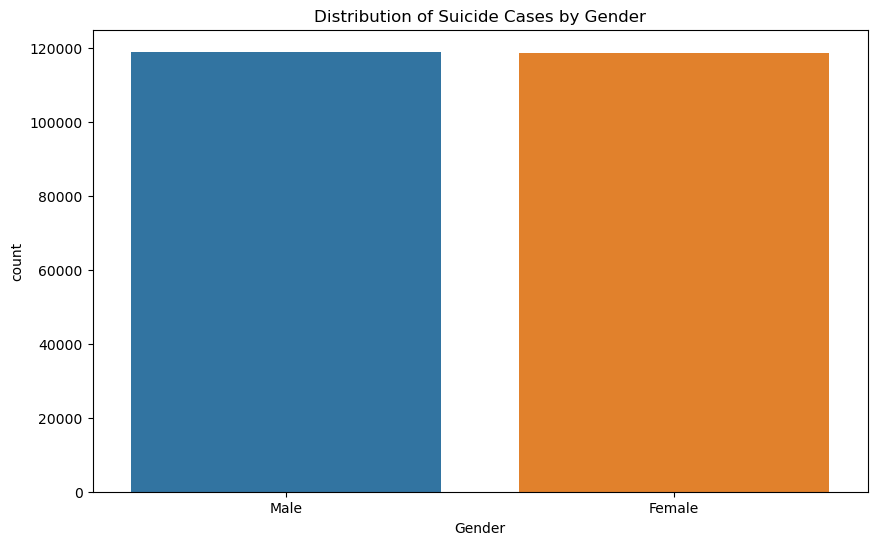

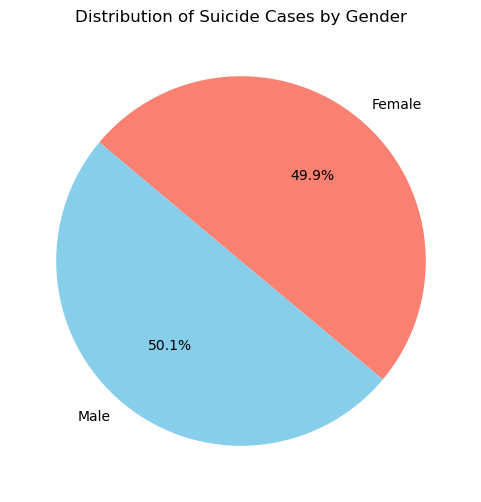

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Suicide Cases by Gender')
plt.show()

plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Distribution of Suicide Cases by Gender")
plt.show()


# Distribution of Gender wise suscide rate with year

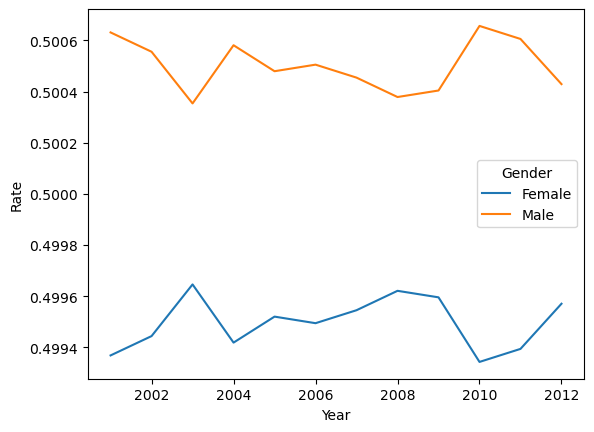

In [14]:
suicide_rate = df.groupby(['Year', 'Gender']).size().reset_index(name='Count')
suicide_rate['Rate'] = suicide_rate['Count'] / suicide_rate.groupby('Year')['Count'].transform('sum')

# Create a line plot
sns.lineplot(x='Year', y='Rate', hue='Gender', data=suicide_rate)
plt.show()

#  Trend of suicide cases over time

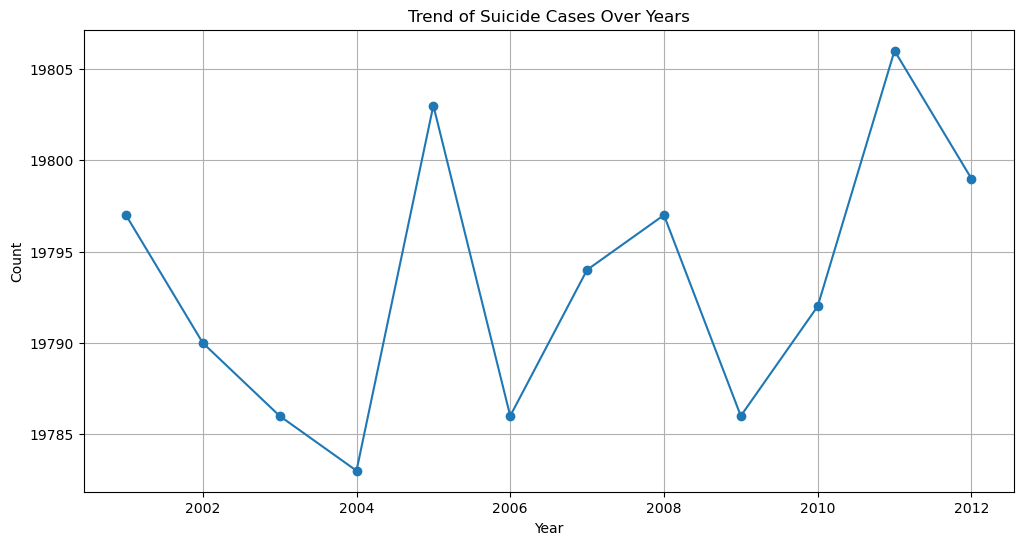

In [15]:
plt.figure(figsize=(12, 6))
time_series = df.groupby('Year')['Type'].count()
time_series.plot(marker='o')
plt.title("Trend of Suicide Cases Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


# Distribution of Suicide Cases by Age Group

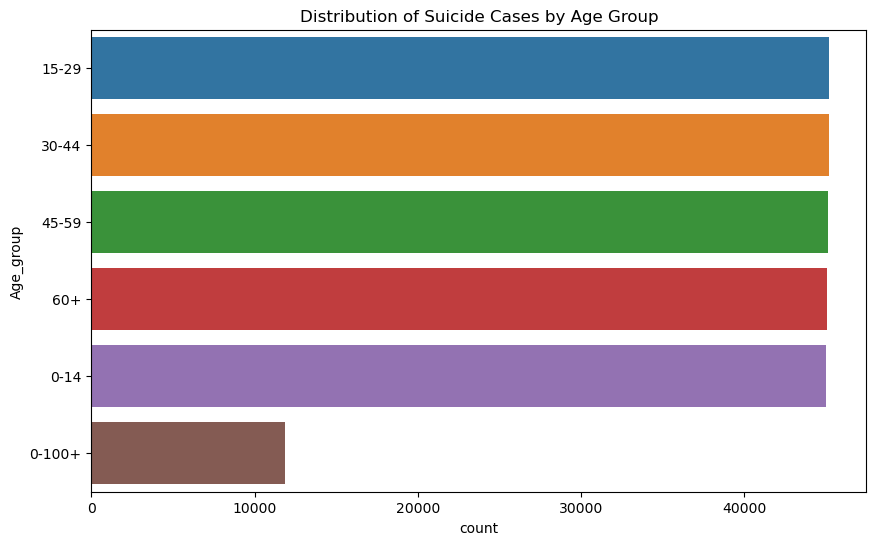

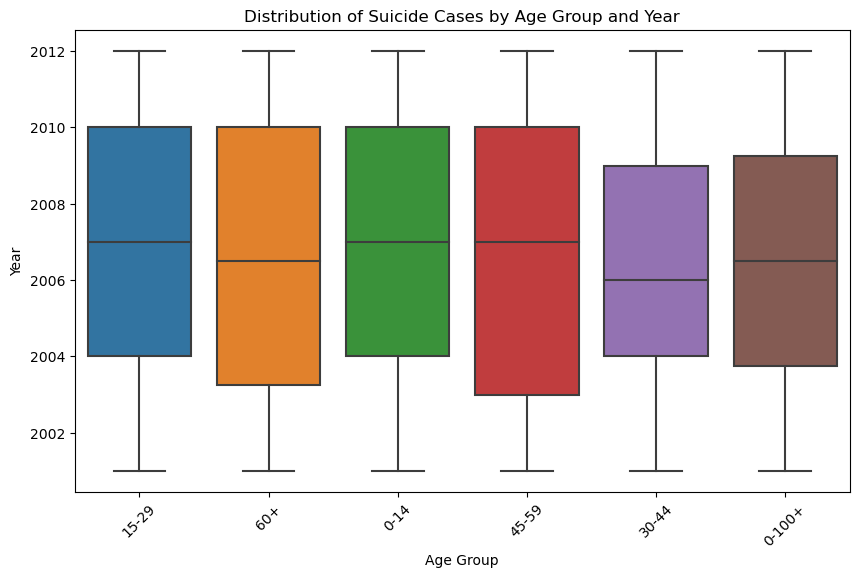

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Age_group', data=df, order=df['Age_group'].value_counts().index)
plt.title('Distribution of Suicide Cases by Age Group')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age_group', y='Year')
plt.title("Distribution of Suicide Cases by Age Group and Year")
plt.xticks(rotation=45)
plt.xlabel("Age Group")
plt.ylabel("Year")
plt.show()




#  Distribution of suicide cases by 'Type_code' and 'Gender'

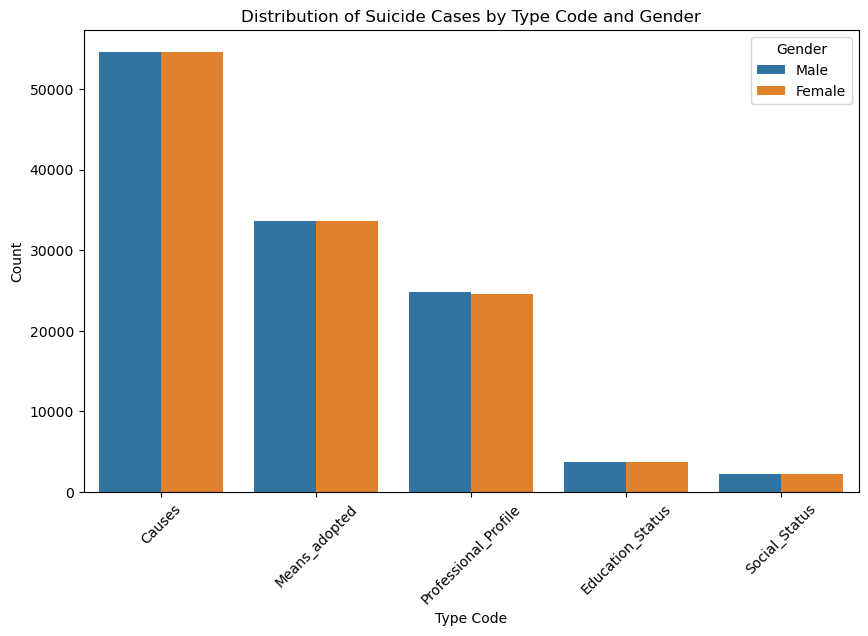

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type_code', hue='Gender', order=df['Type_code'].value_counts().index)
plt.title("Distribution of Suicide Cases by Type Code and Gender")
plt.xticks(rotation=45)
plt.xlabel("Type Code")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


# Distribution of Suicide Cases by State, Age Group, and Year

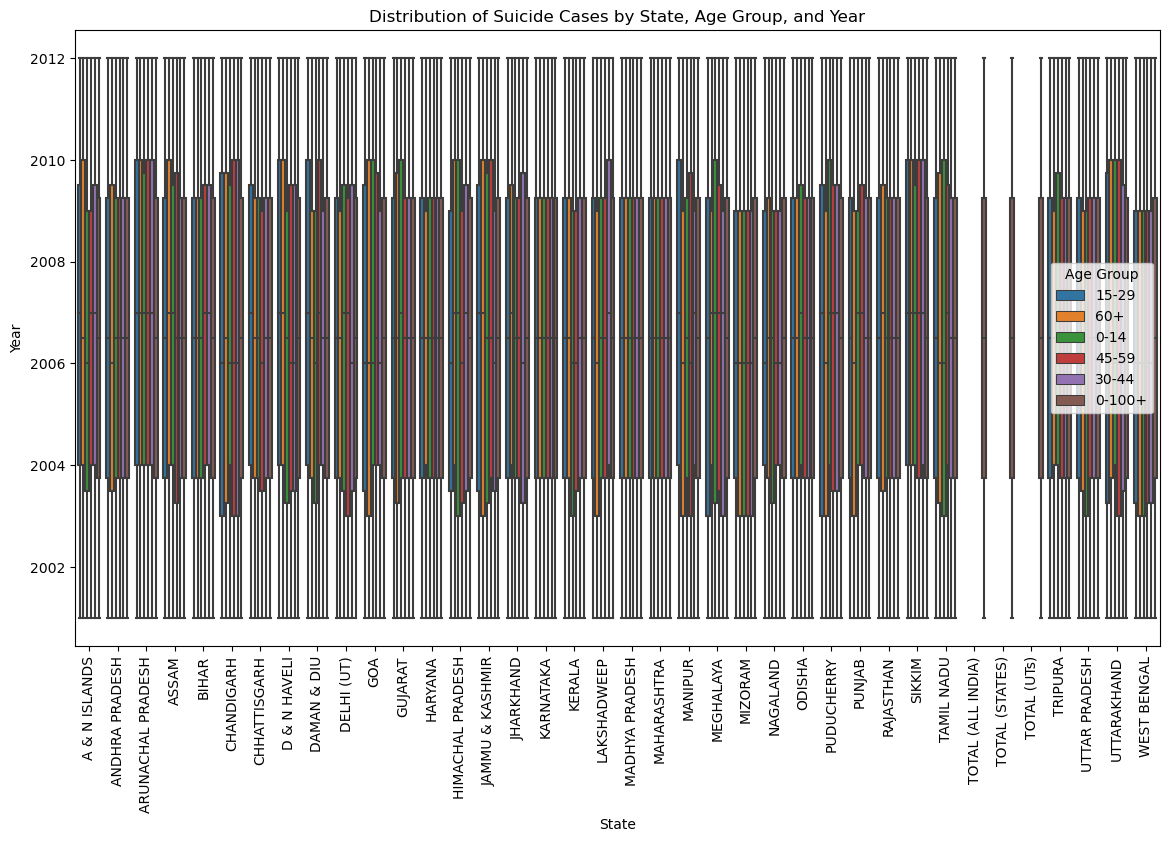

In [18]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='State', y='Year', hue='Age_group')
plt.title("Distribution of Suicide Cases by State, Age Group, and Year")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Year")
plt.legend(title="Age Group")
plt.show()


# Distribution of suicide cases by 'Type' and 'Age_group

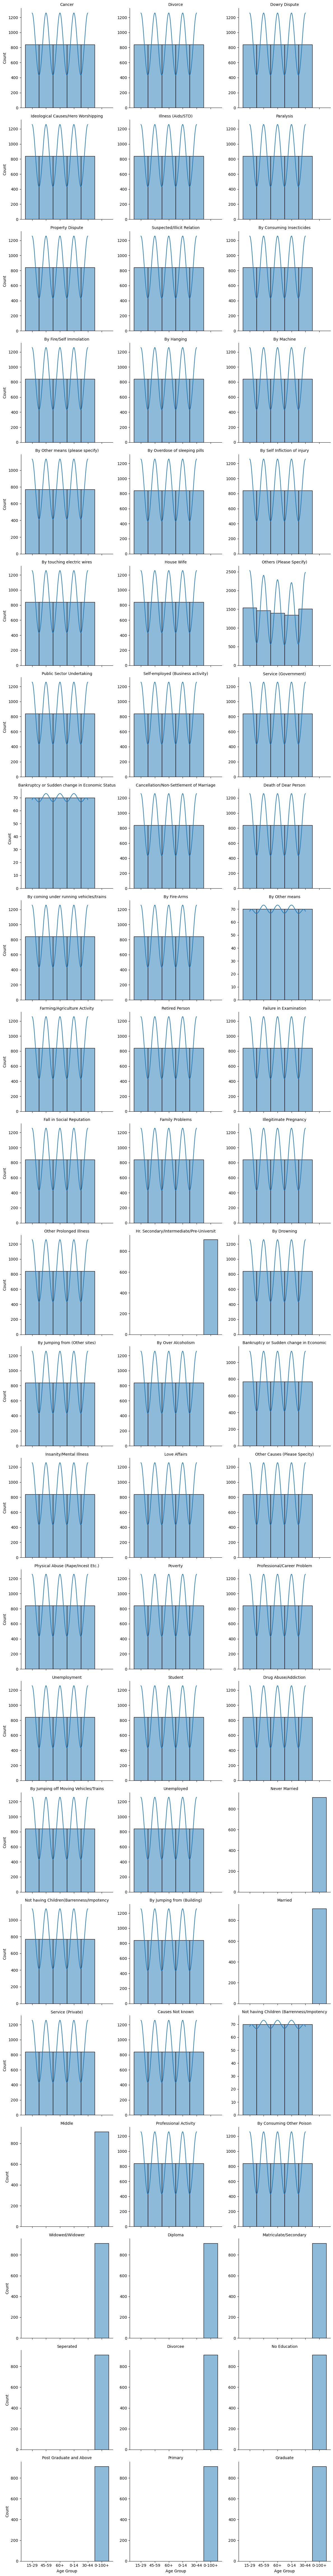

In [19]:
g = sns.FacetGrid(df, col='Type', col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'Age_group', bins=10, kde=True)
g.set_axis_labels("Age Group", "Count")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()


# Sunburst Chart of Suicide Cases

In [20]:
import plotly.express as px

# Group the data and calculate the count of each combination
grouped_data = df.groupby(['Year', 'Gender', 'Age_group', 'Type']).size().reset_index(name='Count')

# Create the sunburst chart
fig = px.sunburst(grouped_data, path=['Year', 'Gender', 'Age_group', 'Type'], values='Count')
fig.update_layout(title="Sunburst Chart of Suicide Cases")
fig.show()


# ****Geographical Visualization

In [34]:
# Load the suicide dataset
suicide_data = pd.read_csv('/kaggle/input/suicide-cases-in-india/Suicides_in_India.csv')

# Load the India states shapefile
india_states = gpd.read_file('/kaggle/input/india-states/Igismap')



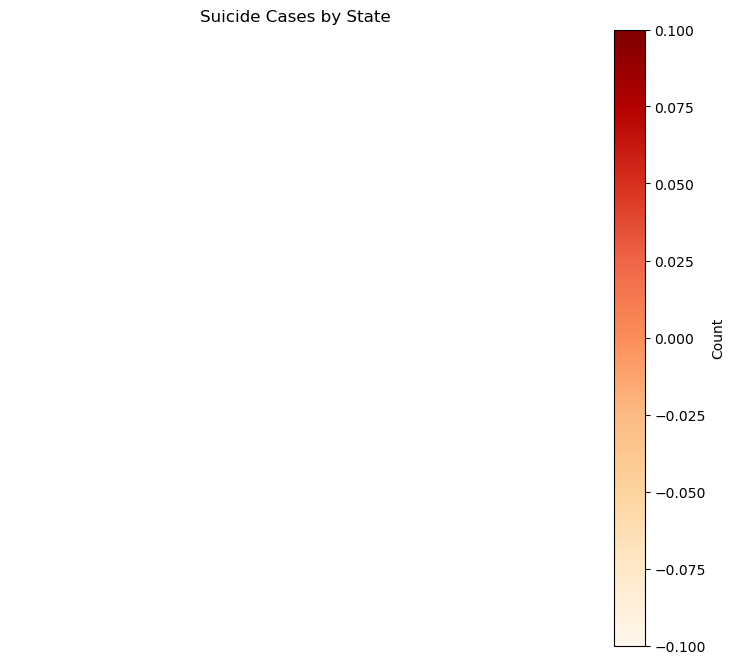

In [36]:
# Rename the column names in the India states dataset
india_states.rename(columns={'st_nm': 'State'}, inplace=True)

# Group the suicide dataset by state and type, and calculate the count of cases per state
state_case_counts = suicide_data.groupby(['State', 'Type'])['Type'].count().reset_index(name='Count')

# Merge the India states dataset with the suicide case counts
merged = india_states.merge(state_case_counts, on='State', how='left')
# Extract relevant columns for visualization
visualization_data = merged[['State', 'Count', 'geometry']]

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
visualization_data.plot(column='Count', ax=ax, legend=True, cmap='OrRd', cax=cax, legend_kwds={'label': "Count"})
ax.set_title("Suicide Cases by State")
ax.set_axis_off()
plt.show()
